Statistics about Raw STARR-OMOP Dataset

In [41]:
from hf_ehr.config import PATH_TO_CACHE_DIR
import os
import json
import numpy as np
import statistics
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

SPLITS = ['all', 'train', 'val', 'test']

path_to_v8_stats_dir: str = os.path.join(PATH_TO_CACHE_DIR, 'dataset_stats', 'v8')
path_to_v9_stats_dir: str = os.path.join(PATH_TO_CACHE_DIR, 'dataset_stats', 'v9')

## Load Data

In [7]:
# Load data
code_2_count = json.load(open(os.path.join(path_to_v8_stats_dir, 'code_2_count.json'), 'r'))
code_2_patient_count = json.load(open(os.path.join(path_to_v8_stats_dir, 'code_2_patient_count.json'), 'r'))
patient_2_sequence_length = json.load(open(os.path.join(path_to_v8_stats_dir, 'patient_2_sequence_length.json'), 'r'))
patient_2_unique_sequence_length = json.load(open(os.path.join(path_to_v8_stats_dir, 'patient_2_unique_sequence_length.json'), 'r'))

## Stats

In [39]:
# High-level stats
for split in SPLITS:
    n_events: int = sum(code_2_count[split].values())
    n_patients: int = len(patient_2_sequence_length[split])
    print(f"==== {split} ====")
    print(f"  # of events: {n_events}")
    print(f"  # of unique codes: {len(code_2_count[split])}")
    print(f"  # of unique patients: {n_patients}")
    print("")
    print(f"  min events/patient: {min(patient_2_sequence_length[split].values())}")
    print(f"  mean events/patient: {round(statistics.mean(patient_2_sequence_length[split].values()), 2)}")
    print(f"  median events/patient: {statistics.median(patient_2_sequence_length[split].values())}")
    print(f"  max events/patient: {max(patient_2_sequence_length[split].values())}")
    print("")
    print(f"  min unique events/patient: {min(patient_2_unique_sequence_length[split].values())}")
    print(f"  mean unique events/patient: {round(statistics.mean(patient_2_unique_sequence_length[split].values()), 2)}")
    print(f"  median unique events/patient: {statistics.median(patient_2_unique_sequence_length[split].values())}")
    print(f"  max unique events/patient: {max(patient_2_unique_sequence_length[split].values())}")
    print("")

==== all ====
  # of events: 5001616678
  # of unique codes: 4292751
  # of unique patients: 3668615

  min events/patient: 1
  mean events/patient: 1363.35
  median events/patient: 121
  max events/patient: 890048

  min unique events/patient: 1
  mean events/patient: 262.21
  median events/patient: 86.0
  max unique events/patient: 11930

==== train ====
  # of events: 3501210238
  # of unique codes: 3144978
  # of unique patients: 2567450

  min events/patient: 1
  mean events/patient: 1363.69
  median events/patient: 121.0
  max events/patient: 890048

  min unique events/patient: 1
  mean events/patient: 263.34
  median events/patient: 86.0
  max unique events/patient: 9599

==== val ====
  # of events: 749003035
  # of unique codes: 881012
  # of unique patients: 550305

  min events/patient: 1
  mean events/patient: 1361.07
  median events/patient: 121
  max events/patient: 638708

  min unique events/patient: 1
  mean events/patient: 263.25
  median events/patient: 87
  max uni

## Plots

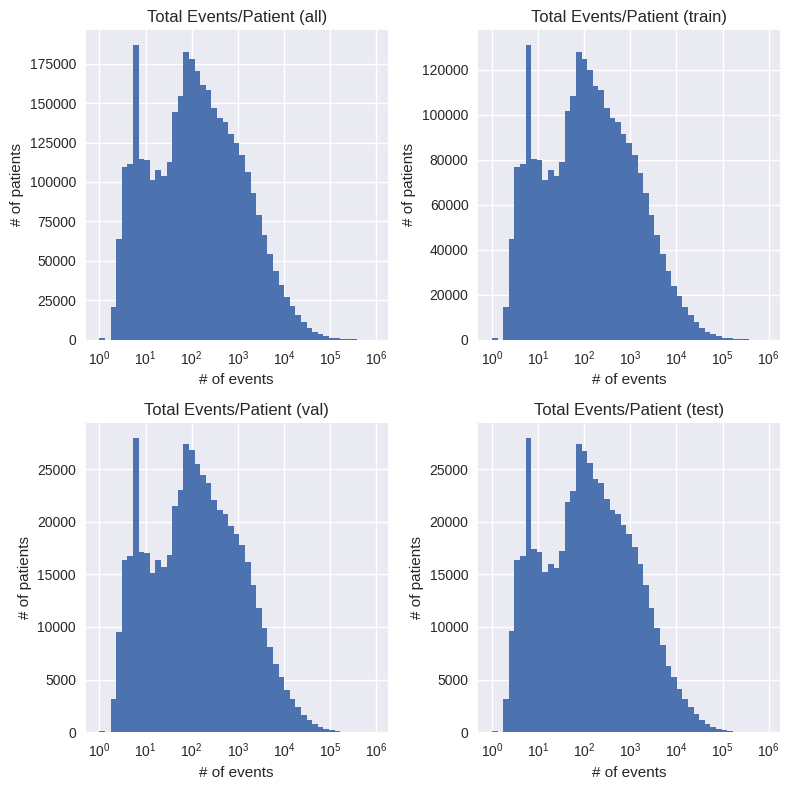

In [40]:
# Distribution of events/patient for each split, one in each subplot of a 2x2 grid. Use a for loop over SPLITS
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
# log spaced bins
min_value = min(min(patient_2_sequence_length[split].values()) for split in SPLITS)
max_value = max(max(patient_2_sequence_length[split].values()) for split in SPLITS)
bins = np.logspace(np.log10(min_value), np.log10(max_value), 50)
for i, split in enumerate(SPLITS):
    axs[i//2, i%2].hist(patient_2_sequence_length[split].values(), bins=bins)
    axs[i//2, i%2].set_title(f"Total # of Events/Patient ({split})")
    axs[i//2, i%2].set_xscale('log')
    axs[i//2, i%2].set_xlabel("# of events")
    axs[i//2, i%2].set_ylabel("# of patients")
plt.tight_layout()
plt.savefig(os.path.join(path_to_v8_stats_dir, 'patient_2_sequence_length.png'))
plt.show()


In [ ]:
# Distribution of UNIQUE events/patient for each split, one in each subplot of a 2x2 grid. Use a for loop over SPLITS
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
# log spaced bins
min_value = min(min(patient_2_unique_sequence_length[split].values()) for split in SPLITS)
max_value = max(max(patient_2_unique_sequence_length[split].values()) for split in SPLITS)
bins = np.logspace(np.log10(min_value), np.log10(max_value), 50)
for i, split in enumerate(SPLITS):
    axs[i//2, i%2].hist(patient_2_unique_sequence_length[split].values(), bins=bins)
    axs[i//2, i%2].set_title(f"Total # of Unique Events/Patient ({split})")
    axs[i//2, i%2].set_xscale('log')
    axs[i//2, i%2].set_xlabel("# of events")
    axs[i//2, i%2].set_ylabel("# of patients")
plt.tight_layout()
plt.savefig(os.path.join(path_to_v8_stats_dir, 'patient_2_unique_sequence_length.png'))
plt.show()

In [ ]:
# Distribution of code occurrences for each split, one in each subplot of a 2x2 grid. Use a for loop over SPLITS
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
# log spaced bins
min_value = min(min(code_2_count[split].values()) for split in SPLITS)
max_value = max(max(code_2_count[split].values()) for split in SPLITS)
bins = np.logspace(np.log10(min_value), np.log10(max_value), 50)
for i, split in enumerate(SPLITS):
    axs[i//2, i%2].hist(code_2_count[split].values(), bins=bins)
    axs[i//2, i%2].set_title(f"Total # of Events/Code ({split})")
    axs[i//2, i%2].set_xscale('log')
    axs[i//2, i%2].set_xlabel("# of events")
    axs[i//2, i%2].set_ylabel("# of codes")
plt.tight_layout()
plt.savefig(os.path.join(path_to_v8_stats_dir, 'code_2_count.png'))
plt.show()